# Business Statment 

Predicting price of a diamond based on the attributes of cut, color, clarity and carat.

For doing this we follow the steps outlined below for basic Data Analysis

There are five core activities of data analysis:

1. Stating and refining the question
2. Exploring the data
3. Building formal statistical models
4. Interpreting the results
5. Communicating the results

**This classic dataset contains the prices and other attributes of almost 54,000 diamonds**


In [27]:
library(tidyverse)

library(ggplot2)

library(ggrepel)

library(corrplot)

library(GGally)

library(car)

In [9]:
df <- read.csv('../input/diamonds/diamonds.csv')

head(df)

,X,carat,cut,color,clarity,depth,table,price,x,y,z
,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,4,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
5,5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
6,6,0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content

* **price - price in US dollars (\$326--\$18,823)**

* **carat - weight of the diamond (0.2--5.01)**

* **cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)**

* **color- diamond colour, from J (worst) to D (best)**

* **clarity- a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))**

* **x -length in mm (0--10.74)**

* **y - width in mm (0--58.9)**

* **z - depth in mm (0--31.8)**

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)



In [ ]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut))

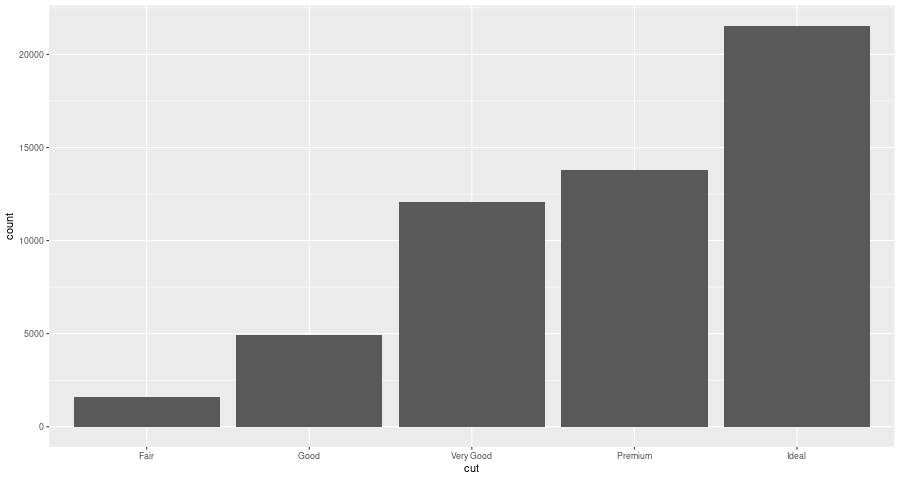

**There are more ideal cut diamonds than anything else .Very likely they are the best sellers and more in demand**

In [ ]:
plot(diamonds$color)

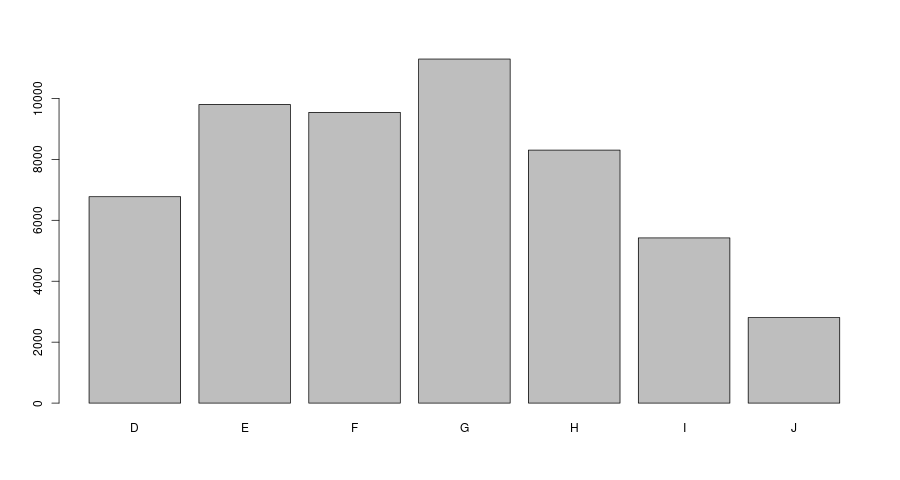

There's less of the lower quality diamonds as we would expect! Overall there are less I & J diamonds (lesser quality) than the higher quality diamonds. There are also less D color diamonds. There seems to be a close to even distribution between diamonds that are colored between E, F, and G. This may mean that customer demand is most for diamonds of color E, F and G. 

In [ ]:
plot(diamonds$clarity)

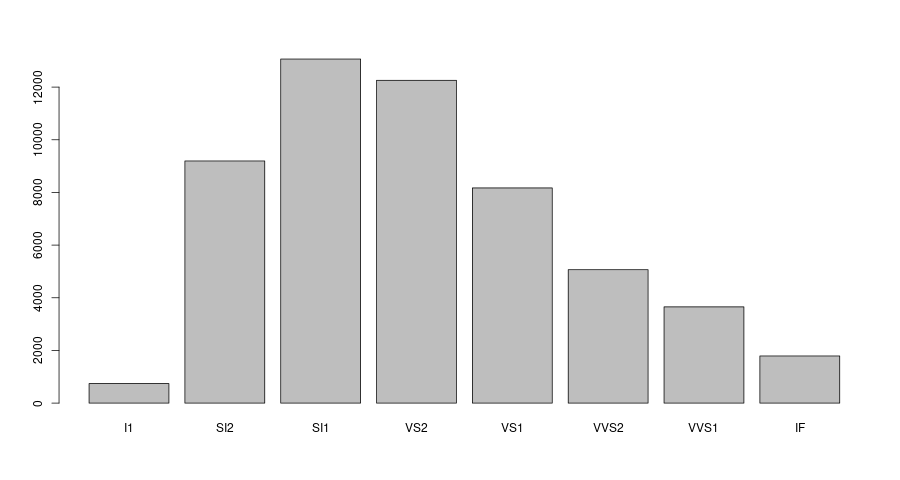

There's more of the lesser quality diamonds as we would expect! As the quality increases, the overall demand appears to decrease. I think this is due to the fact that only people who have more money can afford to buy the higher priced diamonds. That would make sense, since there are less people with more money overall that can afford a more expensive diamond. 

In [ ]:
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = carat), binwidth = 0.5)

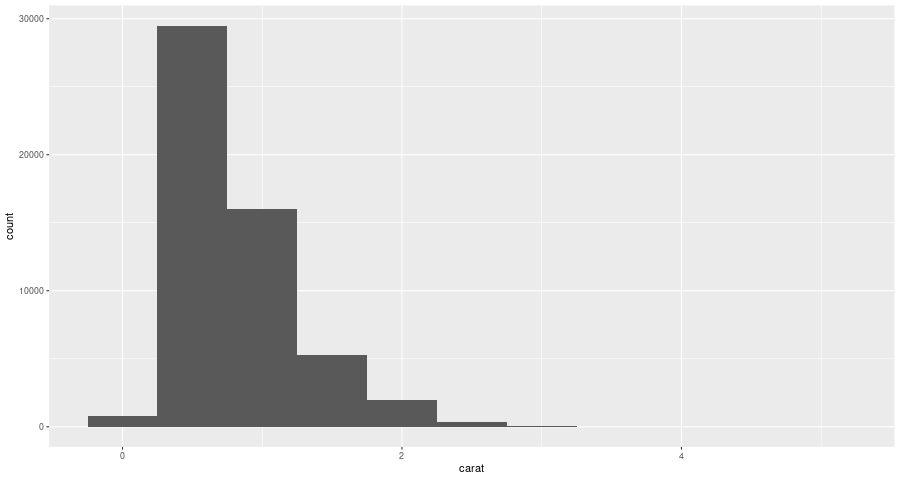

In [ ]:
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = carat), binwidth = 0.1)+
  facet_wrap(~cut)

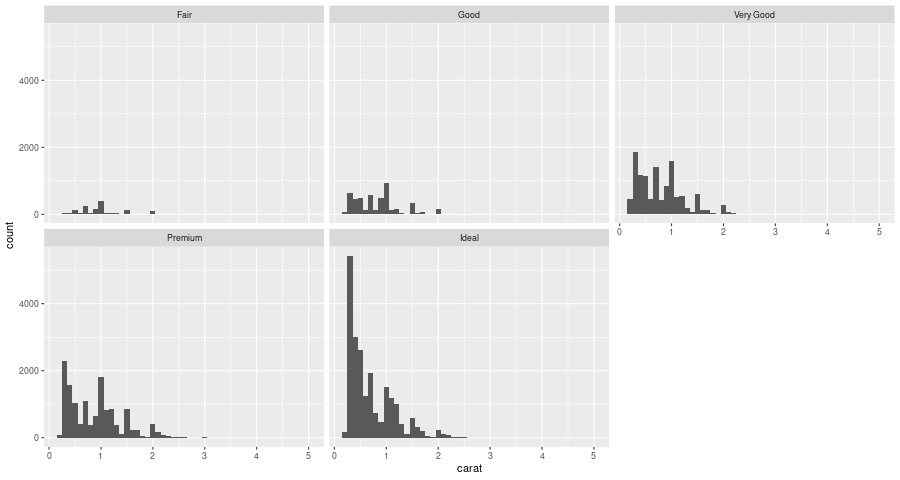

In [ ]:
ggplot(data = diamonds, mapping = aes(x = carat, colour = cut)) +
  geom_freqpoly(binwidth = 0.1)

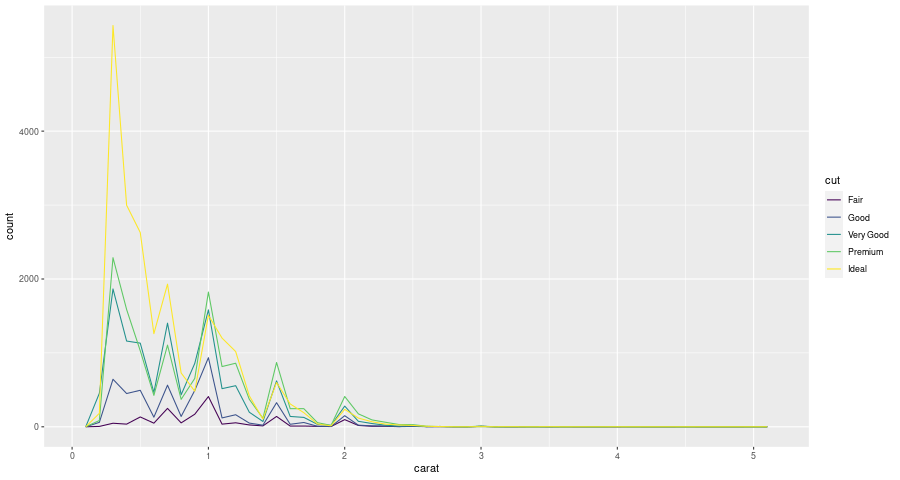

In [ ]:
ggplot(df, aes(x=price))+
  geom_histogram(color="darkblue", fill="lightblue")

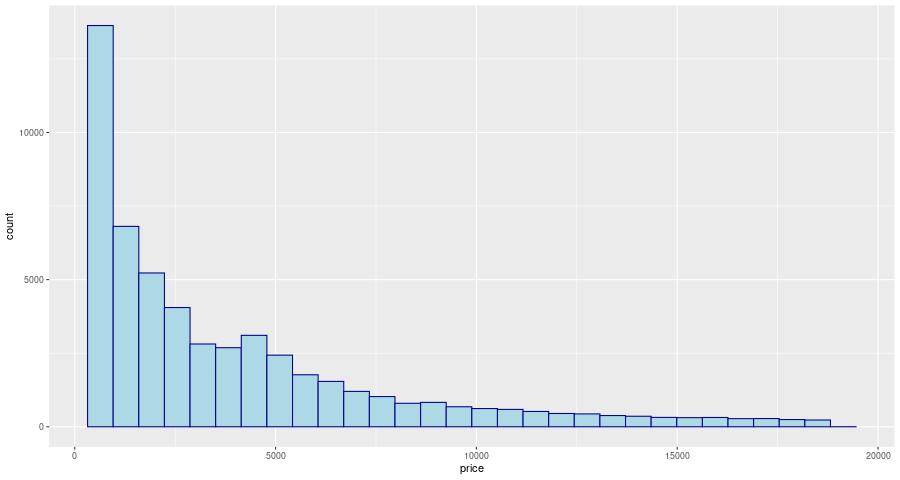

This is a long tail distribution. It has a very high concentration of obversations below US $5,000 mark. 

Why is this significant? 

It seems to show that there is a demand for the "higher quality diamonds." The demand shows there are less people who are willing to pay more for such higher quality diamonds. Supports my comments on the previous graphs. 


In [ ]:
mean(df$price)

**Mean is $3,932.80**

**Most diamonds are priced below $5,000 based on looking at the graphs**

# Covariation

Covariation is when the values of two or more variables vary in a related manner. The best way to discover covariation is to visualize the relation.

This example plots the relationship between two continuous variables: price and carat.

In [ ]:
plt <- ggplot(df,aes(x = carat, y = price)) +
  geom_point(
    aes(color = cut, shape = cut),
    size = 1.5, 
    alpha = 0.8 # It's nice to add some transparency because there may be overlap.
  ) +
  # Use custom colors
  scale_color_manual(
    values = c("#386cb0", "#fdb462", "#7fc97f","#999999", "#E69F00", "#56B4E9")
  )

plt 

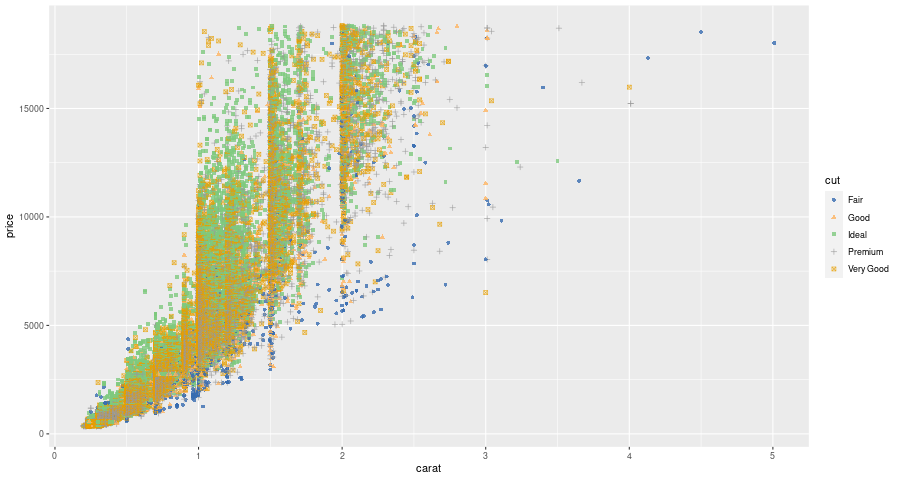

**As you can see in the plot, it is obvious that with an increase in carat the price also increases, but due to a large number of data points, it creates an issue of overplot. Overplot is when there are too many data points in a plot, making it very difficult to summarize the findings from the plot.**

**Instead, let's try using a boxplot to divide the continuous data points into quartiles. In this example, you will take carat as a categorical variable and create a bin of 0.1.**

In [ ]:
ggplot(data = df, mapping = aes(x = carat, y = price)) + 
  geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)))

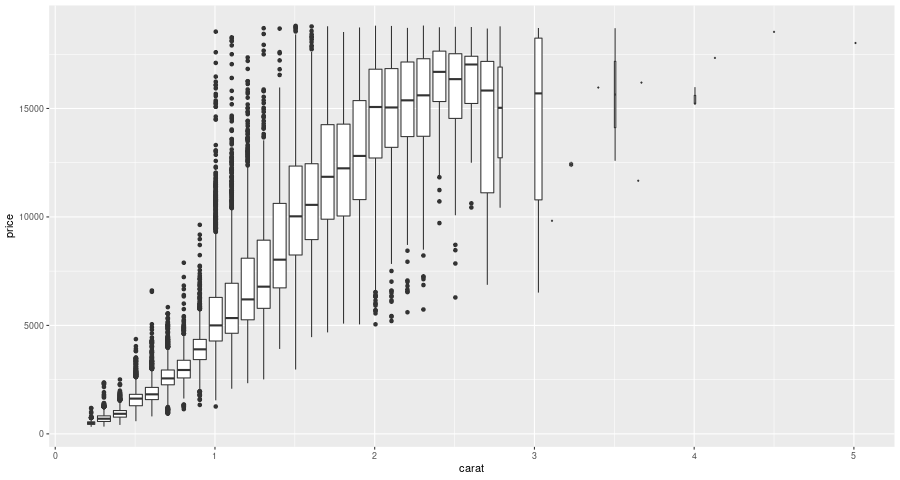

From the above we see a few unusual data points:

**Some one carat diamonds have an exceptionally high price,**

**The average price of three carat diamonds is relatively low.**

**The data points above three carats can be ignored because they are not contributing much to the analysis.**

With this plot, we find the relationship between two categorical variables or one categorical and one continuous variable.

In [ ]:
ggplot(data=df, aes(x=carat, y=price)) +
  # get rid of top percentile as they could skew the data
  scale_x_continuous(lim=c(0,quantile(diamonds$carat,0.99))) +
  scale_y_continuous(lim=c(0,quantile(diamonds$price,0.99))) +
  geom_point(fill=I('#dd3333'), color= I("black"), aes(alpha=1/10),shape=21) +
  stat_smooth(method='lm')

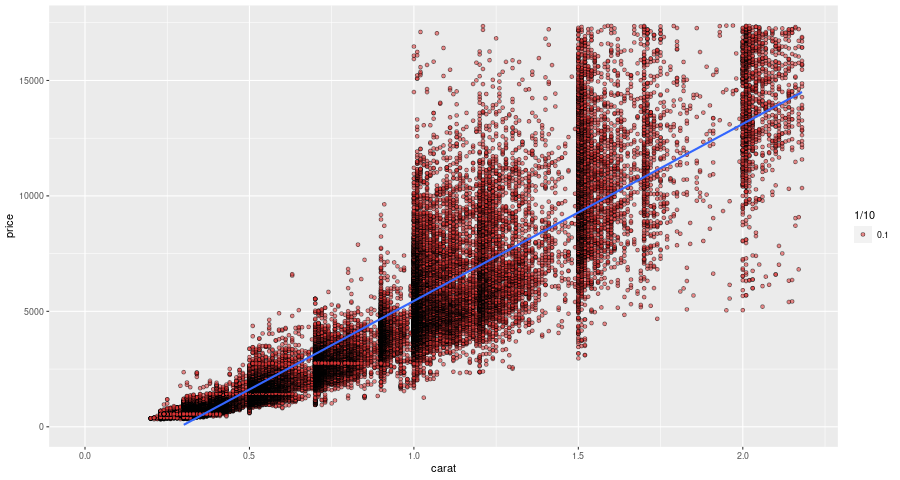

**It appears that there is a positive, linear relationship between price and carat weight. We need to further investigate this**

In [ ]:
set.seed(42)
diamond_samp <- df[sample(1:length(df$price), 25000), ] #Looking at the first 25,000 diamonds
ggpairs(diamond_samp, outlier.shape = I('.'))

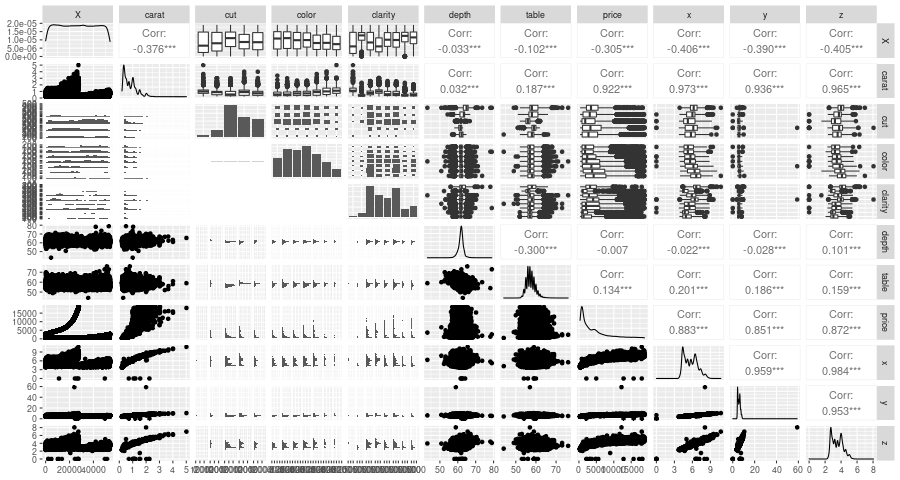

* The diagnol plots for color, clarity, depth and possibly table seem to be normally distributed. 

* The x, y, and z variable appear to be highly correlated with each other,since these variables are what makes up the depth and table of a diamond or rather x, y and z are the diamond 
dimensions.

* When you look at price versus the x, y and z variables there is a logarithmic relationship. 


* There is carat versus price is an exponential relationship.
Using basic knowledge about diamonds, we know that the higher quality diamonds are very rare to find. Hence a more logarithmic function or rather they become so rare, that there are only a few that are available,because the variables xyz(volume) contribute to the carat weight of a diamond 

Possibility that the cubed root of the carat weight might be of help in our model. 

In [ ]:
ggplot(data = df, mapping = aes(x = carat, y = price)) + 
  geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)))

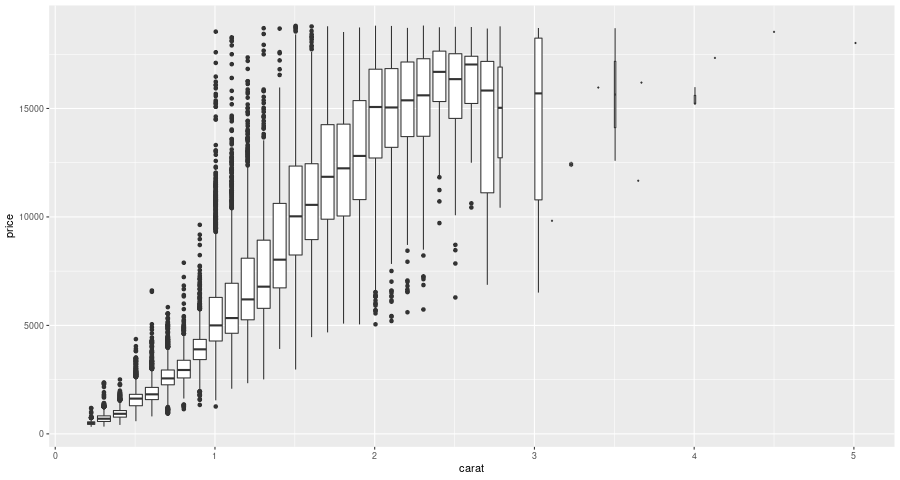

In [ ]:
qplot(x=price, data = subset(df, !is.na(cut)), xlab = 'price', binwidth = 5, breaks = seq(0, 16000, 100), color = 'red') +
  facet_wrap(~cut, scales = "free")

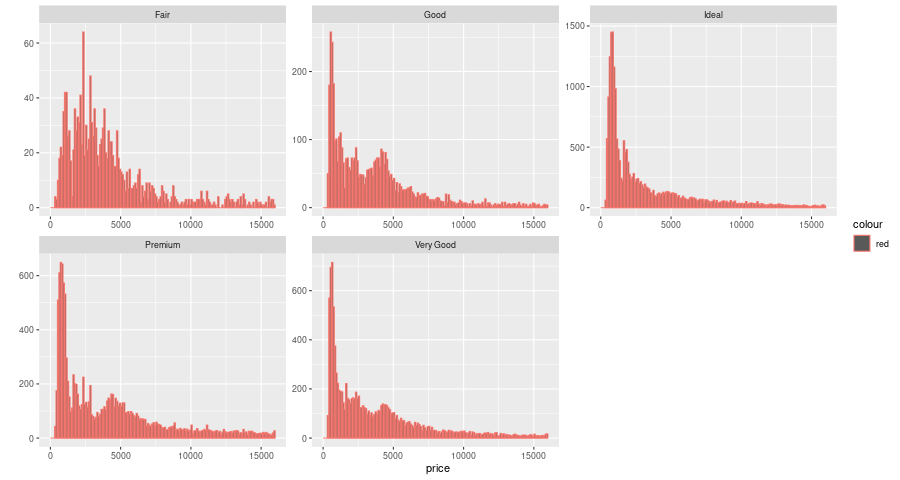

In [ ]:
by(df$price, df$cut, max)

In [ ]:
by(diamonds$price, diamonds$cut, min)

In [ ]:
ggplot(df, aes(factor(cut), price, fill=cut)) +
geom_boxplot() + 
ggtitle("Diamond Price according Cut") +
xlab("Type of Cut") + 
ylab("Diamond Price in US Dollars")

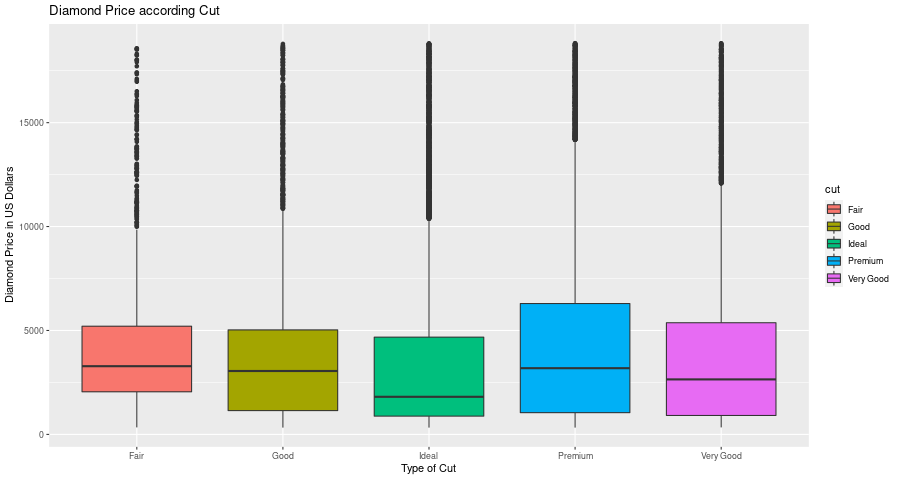

It doesn't appear that Cut is a good way to determine the quality or whether or not a diamond will be expensive.

Maybe it's a marketing thing or branding effect? It's yet another way to make folks feel like they are picking a higher quality diamond? 

Maybe it's a "feel better" about your purchase metric? It's interesting why it's included when it does not seem to affect price that much. 

# Price of Diamonds by Clarity

In [ ]:
ggplot(diamonds, aes(factor(clarity), price, fill=clarity)) +
geom_boxplot() + 
ggtitle("Diamond Price according Clarity") +
xlab("Type of Clarity") + 
ylab("Diamond Price in US Dollars")

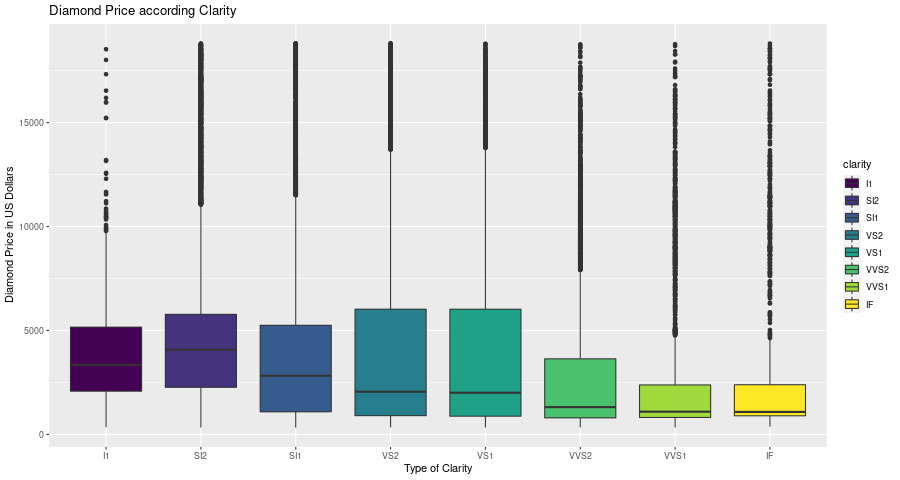

**Clarity is a meaningful variable as compared to cut based on the above.**

In [11]:
by(df$price, diamonds$clarity, summary)

diamonds$clarity: I1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    345    2080    3344    3924    5161   18531 
------------------------------------------------------------ 
diamonds$clarity: SI2
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    326    2264    4072    5063    5777   18804 
------------------------------------------------------------ 
diamonds$clarity: SI1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    326    1089    2822    3996    5250   18818 
------------------------------------------------------------ 
diamonds$clarity: VS2
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    334     900    2054    3925    6024   18823 
------------------------------------------------------------ 
diamonds$clarity: VS1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    327     876    2005    3839    6023   18795 
------------------------------------------------------------ 
diamonds$clarity: VVS2
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  336.0   794.2  13

**It seems from the data above that maximum price of diamonds are quite similar among all based on clarity**

In [12]:
by(df$price, diamonds$color, summary)

diamonds$color: D
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    357     911    1838    3170    4214   18693 
------------------------------------------------------------ 
diamonds$color: E
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    326     882    1739    3077    4003   18731 
------------------------------------------------------------ 
diamonds$color: F
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    342     982    2344    3725    4868   18791 
------------------------------------------------------------ 
diamonds$color: G
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    354     931    2242    3999    6048   18818 
------------------------------------------------------------ 
diamonds$color: H
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    337     984    3460    4487    5980   18803 
------------------------------------------------------------ 
diamonds$color: I
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    334    1120    3730    5092    7202   1

**Similary, minimum price of the diamonds are quite similary priced among diamonds based on color**

# Price per carat by color

In [ ]:
ggplot(df, aes(factor(color), price, fill=color)) +
geom_boxplot() + 
ggtitle("Diamond Price according Color") + 
xlab("Type of Color") + 
ylab("Diamond Price in US Dollars")

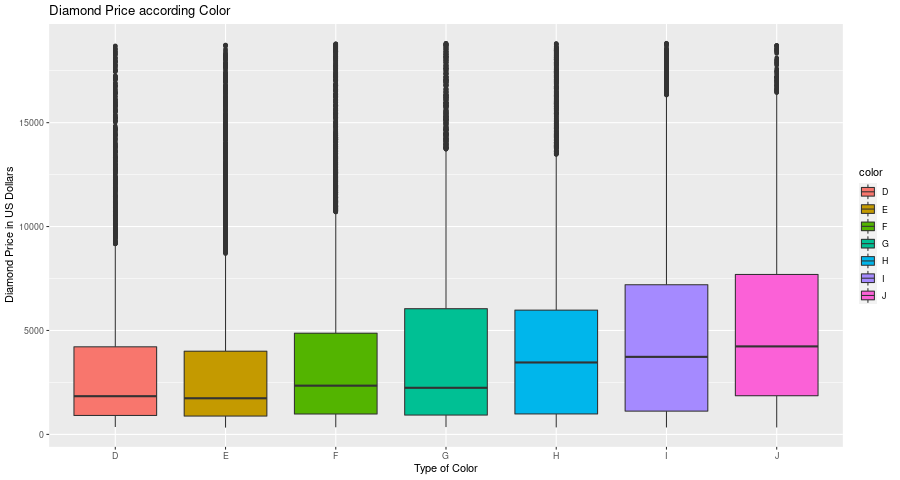

**Color looks like it makes a difference in the quality or whether or not a diamond will be expensive - as we would expect. Color is a meaningful variable as compared to cut.** 

In [ ]:
ggplot(data = df) +
geom_bar(mapping = aes(x = cut, fill = clarity)) +
ggtitle("Cut Stratified with Clarity Differentiated Cut Bins") + 
xlab("Cut") + 
ylab("Count")

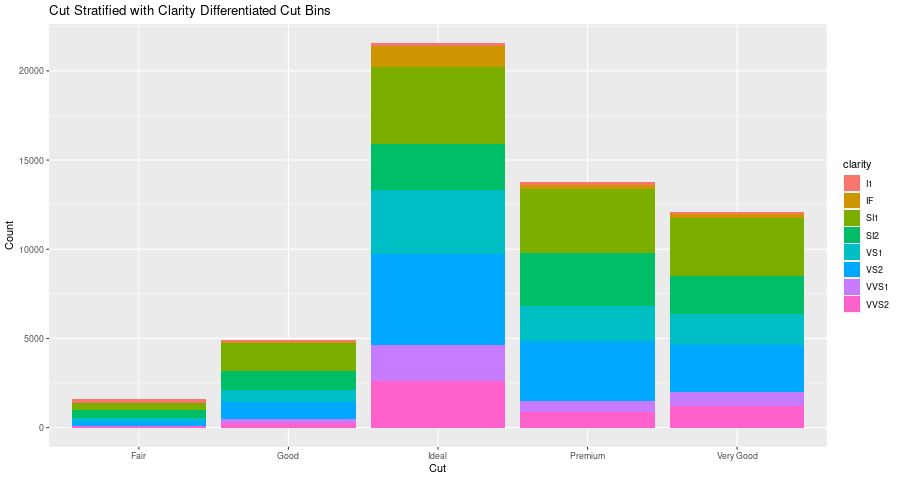

This graph is useful in showing by types of Cut, what the distribution is by clarity.

As we would expect, as the quality increases in clarity, it gets harder to find or becomes more rare. 

Though it's interesting that this graph could possibly show that maybe jewelers who cut diamonds target an ideal cut for all diamonds, but maybe for some reason if it doesn't work out to be an ideal cut, then it becomes a lesser cut? 

**After looking through these plots, it looks like the lesser quality diamonds seem to be more expensive?**

What explains this? 

I think the Carat weight comes into play here. Carat weight seems to be the single most determining factor in deciding the price of a diamond.**

In [ ]:
D <- cor(df[,c(2,6,7,8,9,10,11)])
corrplot(D, method = "number")

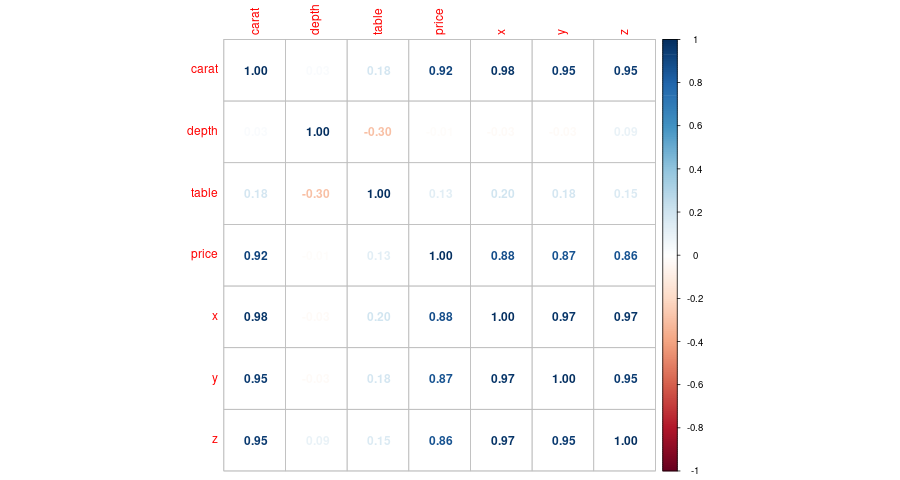

In [14]:
model_diamonds <- lm(price ~ ., data = df)

summary(model_diamonds)


Call:
lm(formula = price ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-21361.9   -599.8   -175.1    382.8  10669.4 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.417e+03  4.103e+02   3.455 0.000551 ***
X             5.364e-03  3.449e-04  15.554  < 2e-16 ***
carat         1.118e+04  4.875e+01 229.366  < 2e-16 ***
cutGood       5.944e+02  3.353e+01  17.726  < 2e-16 ***
cutIdeal      8.413e+02  3.334e+01  25.235  < 2e-16 ***
cutPremium    7.727e+02  3.216e+01  24.023  < 2e-16 ***
cutVery Good  7.410e+02  3.218e+01  23.026  < 2e-16 ***
colorE       -2.118e+02  1.785e+01 -11.863  < 2e-16 ***
colorF       -2.750e+02  1.805e+01 -15.232  < 2e-16 ***
colorG       -4.850e+02  1.768e+01 -27.438  < 2e-16 ***
colorH       -9.760e+02  1.880e+01 -51.926  < 2e-16 ***
colorI       -1.470e+03  2.112e+01 -69.593  < 2e-16 ***
colorJ       -2.373e+03  2.607e+01 -91.027  < 2e-16 ***
clarityIF     5.339e+03  5.091e+01 104.862  < 2e-16 ***

**From the above it shows that except width(y) and depth(z) , all variables are statsitically significant in predicting the price of the diamond.**

**Adjusted R-Square value of 0.92 shows that strong linear relationship of the variables determining the price**

In [23]:
v_res <- vif(model_diamonds)

v_res <- as.data.frame(v_res)

colnames(v_res) <- c('GVIF','Df','GVIF_square')

var_res <- v_res %>% select(c(GVIF_square))


var_res

,GVIF_square
,<dbl>
X,1.106024
carat,4.760001
cut,1.086975
color,1.013869
clarity,1.021830
depth,1.337667
table,1.337438
x,7.629972
y,4.537965


In [25]:
lm_model <- df %>% select(-c(y,z))

In [26]:
price_lr <- lm(price ~ ., data = lm_model)

summary(price_lr)


Call:
lm(formula = price ~ ., data = lm_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-21371.4   -599.7   -175.0    382.7  10669.7 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.597e+03  3.926e+02   4.068 4.75e-05 ***
X             5.364e-03  3.448e-04  15.554  < 2e-16 ***
carat         1.118e+04  4.873e+01 229.505  < 2e-16 ***
cutGood       5.950e+02  3.351e+01  17.755  < 2e-16 ***
cutIdeal      8.417e+02  3.333e+01  25.257  < 2e-16 ***
cutPremium    7.733e+02  3.216e+01  24.045  < 2e-16 ***
cutVery Good  7.412e+02  3.215e+01  23.053  < 2e-16 ***
colorE       -2.119e+02  1.785e+01 -11.870  < 2e-16 ***
colorF       -2.750e+02  1.805e+01 -15.231  < 2e-16 ***
colorG       -4.850e+02  1.768e+01 -27.433  < 2e-16 ***
colorH       -9.759e+02  1.880e+01 -51.919  < 2e-16 ***
colorI       -1.469e+03  2.112e+01 -69.591  < 2e-16 ***
colorJ       -2.374e+03  2.607e+01 -91.031  < 2e-16 ***
clarityIF     5.338e+03  5.090e+01 104.868  < 2e-

**Even after removing variables which show multi-colinearity such as depth and width from the model, the model has not improved quite significantly.**


**However the GLM model shows a quite prediction of the price based on the variables given in the data.**